In [25]:
# Your code here
# Your code here
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pickle import dump

In [26]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,124,56.0,13,105,21.8,0.452,21,0
1,1,146,56.0,0,0,29.7,0.564,29,0
2,1,107,68.0,19,0,26.5,0.165,24,0
3,13,106,72.0,54,0,36.6,0.178,45,0
4,1,143,74.0,22,61,26.2,0.256,21,0


In [27]:
X_train= train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [28]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              0      124           56.0             13      105  21.8   
1              1      146           56.0              0        0  29.7   
2              1      107           68.0             19        0  26.5   
3             13      106           72.0             54        0  36.6   
4              1      143           74.0             22       61  26.2   
..           ...      ...            ...            ...      ...   ...   
609           11      155           76.0             28      150  33.3   
610            3       88           58.0             11       54  24.8   
611            5      114           74.0              0        0  24.9   
612            7      125           86.0              0        0  37.6   
613            2      114           68.0             22        0  28.7   

     DiabetesPedigreeFunction  Age  
0                       0.452   21  
1                       0.564   29  


In [29]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#X, y = load_iris(return_X_y = True, as_frame = True)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#X_train.head()

Step 2: Initialization and training of the model

In [31]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

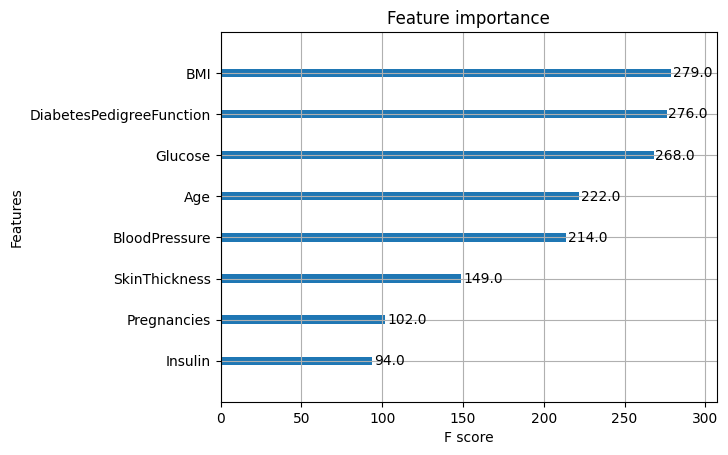

In [32]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Entrenar el modelo
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Graficar la importancia de las características
plot_importance(model)
plt.show()

Visualización de los árboles interactivos (dependiendo de la versión de XGBoost):

In [39]:
from xgboost import to_graphviz

# Convertir el primer árbol a un gráfico Graphviz
graph = to_graphviz(model, num_trees=0)
graph.view()


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

Step 3: Model prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7337662337662337

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    # Add more parameters as needed
}

# Initialize XGBoost classifier
model = XGBClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = XGBClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3}
Accuracy: 0.7662337662337663


In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
    'reg_lambda': [0.1, 0.5, 1.0, 1.5, 2.0],
    'scale_pos_weight': [1, 2, 3, 4, 5]
}
# Initialize XGBoost classifier
model = XGBClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = XGBClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

KeyboardInterrupt: 

Step 4: Saving the model

In [ ]:
model.save_model("boosting_xgb_classifier_default_42.json")